In [3]:
import os
from tqdm import tqdm
from main.ztfdatafiltering import *

In [4]:
# Base paths for your directories and files
base_path = "../data/" # Base path for all directories

path_raw        = os.path.join(base_path, "ztffp_raw_data/")  # Where the raw data is located
path_processed  = os.path.join(base_path, "ztffp_processed_data/")  # Processed files location
path_final      = os.path.join(base_path, "ztffp_final_data/")  # Final processed and filtered DataFrames
path_plots      = os.path.join(base_path, "plots/")  # Directory for saving plots
coordinate_path = os.path.join("coordinates.txt")  # File with RA/Dec coordinates

results_table_path = os.path.join(os.getcwd(), "variability_results.csv")  # Save results table in current directory
results = []  # List to store results

In [6]:
# Step 1: Read RA and Dec from the coordinates file
ra_list, dec_list = read_coordinates_from_file(coordinate_path)

# Step 2: Process each source
for ra, dec in tqdm(zip(ra_list, dec_list), total=len(ra_list), desc="Processing"):
    source_name = create_source_name(ra, dec)

    # Step 3: Create the ZTF table
    #create_ztf_table(path=path_raw, output_directory=path_processed, ra=ra, dec=dec, source_name=source_name, ext_cor=True)

    # Step 4: Plot light curves for each source (Optional)
    # Uncomment to plot light curves
    plot_lc(output_directory=path_processed, path_final=path_final, path_plots=path_plots, source_name=source_name)

    # Step 5: Calculate F_var and append results
    # Uncomment to calculate and save results
    result = plot_hist(output_directory=path_processed, source_name=source_name, ra=ra, dec=dec, results_table_path=results_table_path)
    results.append(result)

Processing:   0%|          | 0/10 [00:00<?, ?it/s]

Insufficient observations for ztf_i, skipping...


Processing:  10%|█         | 1/10 [00:00<00:05,  1.66it/s]

Insufficient observations for ztf_i, skipping...
Insufficient observations for ztf_i, skipping...


Processing:  20%|██        | 2/10 [00:01<00:03,  2.03it/s]

Insufficient observations for ztf_i, skipping...
Insufficient observations for ztf_i, skipping...


Processing:  30%|███       | 3/10 [00:01<00:03,  1.88it/s]

Insufficient observations for ztf_i, skipping...
Insufficient observations for ztf_i, skipping...


Processing:  40%|████      | 4/10 [00:02<00:03,  1.96it/s]

Insufficient observations for ztf_i, skipping...
Insufficient observations for ztf_i, skipping...


Processing:  50%|█████     | 5/10 [00:02<00:02,  2.10it/s]

Insufficient observations for ztf_i, skipping...
F_var <= 0 for ztf_r, skipping...
Insufficient observations for ztf_i, skipping...


d:\Arquivos Pessoal\Desktop\env\ZTF-Data-Filtering\src\main\ztfdatafiltering.py:203: RuntimeWarning: divide by zero encountered in scalar divide
  error_f_var = np.sqrt((1 / (2 * N)) * (mean_fluxe_squared / (mean_flux ** 2 * f_var ** 2)) + (mean_fluxe_squared / mean_flux ** 2))
d:\Arquivos Pessoal\Desktop\env\ZTF-Data-Filtering\src\main\ztfdatafiltering.py:302: RuntimeWarning: divide by zero encountered in scalar divide
  error_f_var = np.sqrt((1 / (2 * N)) * (mean_fluxe_squared / (mean_flux ** 2 * f_var ** 2)) + (mean_fluxe_squared / mean_flux ** 2))
d:\Arquivos Pessoal\Desktop\env\ZTF-Data-Filtering\src\main\ztfdatafiltering.py:379: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)
Processing: 

F_var <= 0 for ztf_r, skipping...
Insufficient observations for ztf_i, skipping...
Insufficient observations for ztf_i, skipping...


Processing:  70%|███████   | 7/10 [00:03<00:01,  2.32it/s]

Insufficient observations for ztf_i, skipping...
Insufficient observations for ztf_i, skipping...


Processing:  80%|████████  | 8/10 [00:03<00:00,  2.15it/s]

Insufficient observations for ztf_i, skipping...
Insufficient observations for ztf_i, skipping...


Processing:  90%|█████████ | 9/10 [00:04<00:00,  2.20it/s]

Insufficient observations for ztf_i, skipping...
Insufficient observations for ztf_i, skipping...


Processing: 100%|██████████| 10/10 [00:04<00:00,  2.14it/s]

Insufficient observations for ztf_i, skipping...


C:\Users\Pessoal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Pessoal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)



Statistics for F_var:
g-band:
  Mean: 0.2199
  Median: 0.2033
  Std Dev: 0.1559
  Count: 20
------------------------------
r-band:
  Mean: 0.1916
  Median: 0.1667
  Std Dev: 0.1273
  Count: 18
------------------------------
i-band:
  Mean: nan
  Median: nan
  Std Dev: nan
  Count: 0
------------------------------


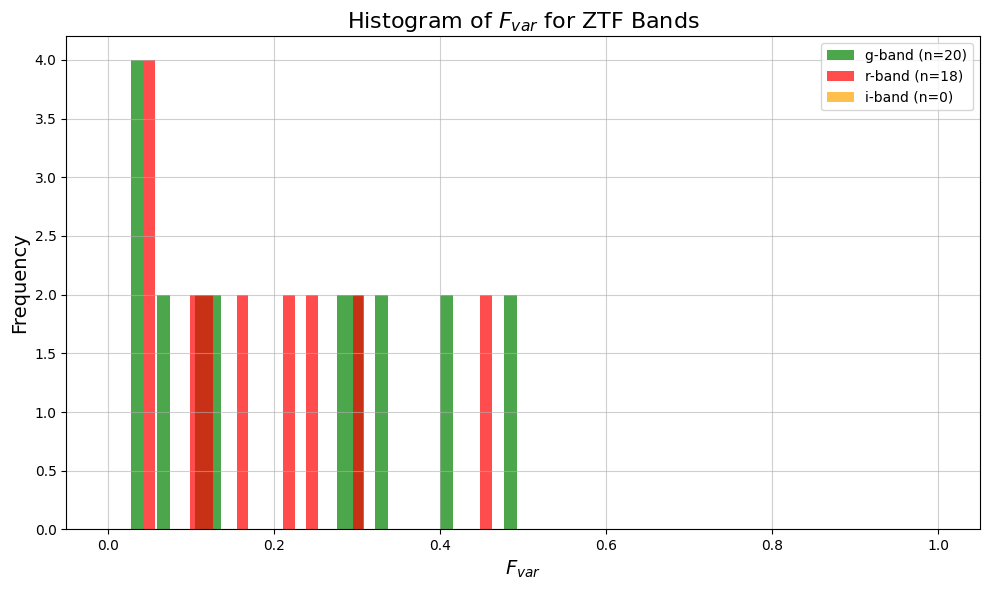

In [7]:
# Step 6: Plot histograms and display statistics
output_directory = os.getcwd()
plot_fvar_statistics(results_table_path, output_directory)
